In [1]:
!pip install -U spacy

!python -m spacy download en_core_web_sm

2023-08-05 11:48:21.784529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 11:48:24.742545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('apple.txt',error_bad_lines=False)
# to load txt file with csv keep error_bad_lines=Flase

<ipython-input-3-ff9d99823d29>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('apple.txt',error_bad_lines=False)
Skipping line 6: expected 1 fields, saw 14



In [4]:
df

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
# how to convert these sentences to paragraph for a corpus?
df['x']
# x is a column name

0     It's amazing..... battery last around 10 -12 h...
1     Finally a MacBook possession. Got it in 50k in...
2     Best Laptop under 60k. If you don't want any a...
3     Pros:1. Light weight and super fast response t...
4                                                     "
5     I am very upset about the product as I checked...
6     Reason for 1 star is I ot an defective piece. ...
7     Got the Apple Macbook air on amazon discount s...
8     White line coming on screen in just three mont...
9     Bought this product recently on 5 April, was w...
10    Hi, Think thousand time before buying. One cal...
11    We buy macbook's expecting that it will lasts ...
12    I use this for music production and it works a...
13    Never purchase any Apple products. I bought 3 ...
14    Good purchase of mineBest for programming...On...
15    I bought MacBook air in 2017, it was working f...
16    Bought it on 9th July, stopped working / not t...
17    I bought it last year from Amazon during S

In [6]:
nlp = spacy.load('en_core_web_sm')
#model name is en_core_web_sm, nlp will now have entire NER model

In [7]:
nlp.pipe_names
# shows which different models are present inside en_core_web_sm model

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [8]:
# we want ner (name entity recognition)

doc = nlp('Mr.Elon is going to acquire Twitter Inc of $45 billion in 2023')

In [9]:
doc.ents
# ents - will display all entities

(Elon, Twitter Inc, $45 billion, 2023)

In [10]:
for i in doc.ents:
  print(i, '|', i.label_)

Elon | PERSON
Twitter Inc | ORG
$45 billion | MONEY
2023 | DATE


In [11]:
doc1 = nlp('Elon is going to acquire Twitter of $45 billion in 2023')

In [12]:
for i in doc1.ents:
  print(i, '|', i.label_)

Twitter | PRODUCT
$45 billion | MONEY
2023 | DATE


In [13]:
# to display graphical representation for tags
displacy.render(doc,style='ent',jupyter=True)
# ent - entity, In Jupyter instead of serve() try render()

In [14]:
# joining all sentences of dataset
txt = ' '.join(df['x']) # with space join all sentences in x
txt

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n             Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you mast

In [15]:
x = nlp(txt)

In [16]:
displacy.render(x,style='ent',jupyter=True)

In [17]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

A word cloud is a visualization technique for text data where the most frequent word is shown in the biggest font size.
You can create Customized Word Cloud in python. Refer documentation

In [19]:
stop = STOPWORDS

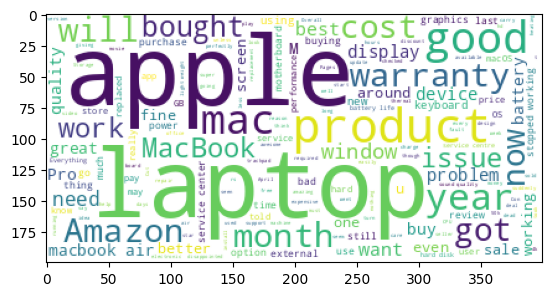

In [20]:
wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
plt.imshow(wc)
# bigger the name of word more the frequency of that word in that corpus
# font of apple, laptop is huge i.e. it is occuring many times in text
# word cloud is important when we are analysing the data when we build Naive bias text classification.
# This is how we can create word cloud